To do the classification by picking out the dataset from server here is the example

We need 
- tensorflow.keras.datasets import the cifar10
- cv2
- pandas
- numpy
- torch

In [2]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

In [3]:
((Xtr, Ytr), (Xte, Yte)) = cifar10.load_data() # return tuple of
Xtr = np.array(Xtr)
Ytr = np.array(Ytr)
Xte = np.array(Xte)
Yte = np.array(Yte)

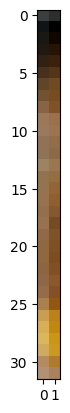

In [4]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

images_by_label = {label: [] for label in labels}

for i, npidx in enumerate(Ytr[:10]):
    images_by_label[labels[npidx[0]]].append(Xtr[i])

# dataframe = pd.DataFrame(images_by_label)
plt.imshow(Xtr[0][:, :2, :])

In [5]:
indexes = np.random.randint(0, len(Xtr), size=32)
corpus = torch.tensor(Xtr[indexes])
clab = torch.tensor(Ytr[indexes])

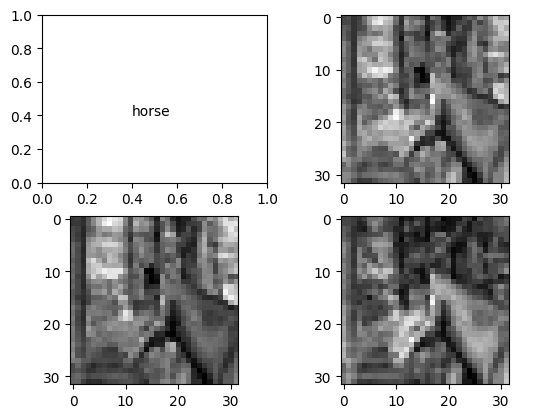

In [6]:
a = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
corpus_r_g_b = corpus.unbind(3)
c_r = corpus_r_g_b[0]
c_g = corpus_r_g_b[1]
c_b = corpus_r_g_b[2]
idx = 1
plt.axis('off')
plt.subplot(2,2,1)
plt.text(0.4, 0.4 ,labels[clab[idx]])
plt.subplot(2,2,2)
plt.imshow(c_r[idx], cmap='gray')
plt.subplot(2,2,3)
plt.imshow(c_g[idx], cmap='gray')
plt.subplot(2,2,4)
plt.imshow(c_b[idx], cmap='gray')

In [7]:
data = np.array(Xtr[0])
data.shape

(32, 32, 3)

In [45]:
torch.manual_seed(2147483647)
X = torch.tensor(Xtr, dtype=torch.float32).reshape(-1, 3072)/256
Y = torch.tensor(Ytr).view(-1)
Weight = torch.randn(3072, 10)*0.3162 # 10 features and 3072 parameters
lossi = []
# plt.imshow(torch.tensor(X[0]*255, dtype=torch.uint8).view(32,32,3))
X[torch.arange(10)].shape,Y[torch.arange(10)].shape

(torch.Size([10, 3072]), torch.Size([10]))

In [46]:
Weight.requires_grad_(True)
count = 0
# lrs = 10**np.linspace(-5, 0, num=1000) 0.23 and 0.9
for i in range(6000):
    ix = torch.randint(0, X.shape[0], size=(100, ))
    xb = X[ix]
    yb = Y[ix]
    l = xb @ Weight
    # TODO: not working the manual loss
    # c = l.exp()
    # probs = c/c.sum(1, keepdim=True)
    # loss = -probs[torch.arange(32)][yb].mean(dim=1).mean().log()
    loss = torch.nn.functional.cross_entropy(l, yb)

    lossi.append(loss.item())
    Weight.grad = None
    
    loss.backward()
    if count%1000 == 0:
        print(loss)
    lr = (0.01 if count < 15000 else 0.001)

    Weight.data += -lr*Weight.grad
    count+=1

tensor(14.2993, grad_fn=<NllLossBackward0>)
tensor(3.2357, grad_fn=<NllLossBackward0>)
tensor(2.8686, grad_fn=<NllLossBackward0>)
tensor(2.1929, grad_fn=<NllLossBackward0>)
tensor(2.1086, grad_fn=<NllLossBackward0>)
tensor(2.1548, grad_fn=<NllLossBackward0>)


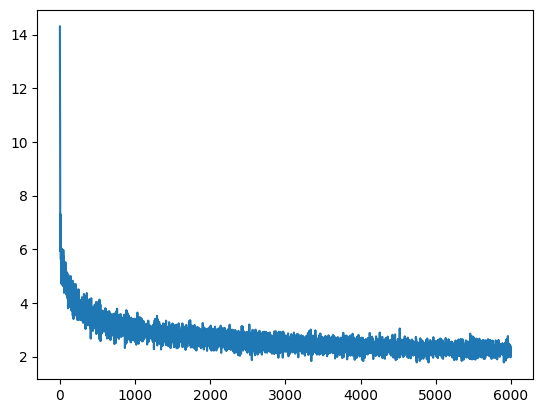

In [47]:
plt.plot(torch.tensor(lossi).view(-1, 1).mean(1, keepdim=True))

In [48]:
X = torch.tensor(Xtr, dtype=torch.float32).reshape(-1, 3072)/256
Y = torch.tensor(Ytr).view(-1)
l = X@Weight
loss = torch.nn.functional.cross_entropy(l, Y)
loss

tensor(2.2388, grad_fn=<NllLossBackward0>)

In [49]:
# test on all data!
X = torch.tensor(Xte, dtype=torch.float32).reshape(-1, 3072)/256
Y = torch.tensor(Yte).view(-1)
l = X@Weight
loss = torch.nn.functional.cross_entropy(l, Y)
loss

tensor(2.2592, grad_fn=<NllLossBackward0>)

C:\Users\imona\AppData\Local\Temp\ipykernel_11356\2960985702.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = torch.tensor((p*256).clone().detach(), dtype=torch.uint8)


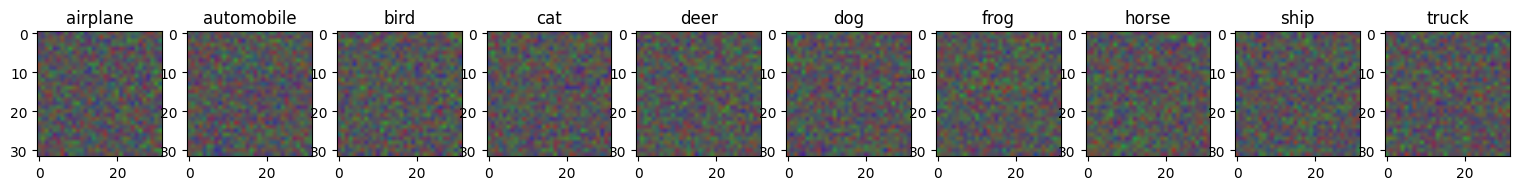

In [50]:
i = 1
plt.figure(figsize=(19, 18))
for _ in range(10):
    c = Weight[:, i-1].view(32, 32, 3).exp()
    p = c/c.sum(2, keepdim=True)
    img = torch.tensor((p*256).clone().detach(), dtype=torch.uint8)
    plt.subplot(1, 10, i)
    plt.title(labels[i-1])
    plt.imshow(img, interpolation='bilinear')
    i += 1

C:\Users\imona\AppData\Local\Temp\ipykernel_11356\1683941887.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = torch.nn.functional.softmax(l)
C:\Users\imona\AppData\Local\Temp\ipykernel_11356\1683941887.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.imshow(torch.tensor(x*255, dtype=torch.uint8).view(32,32,3))


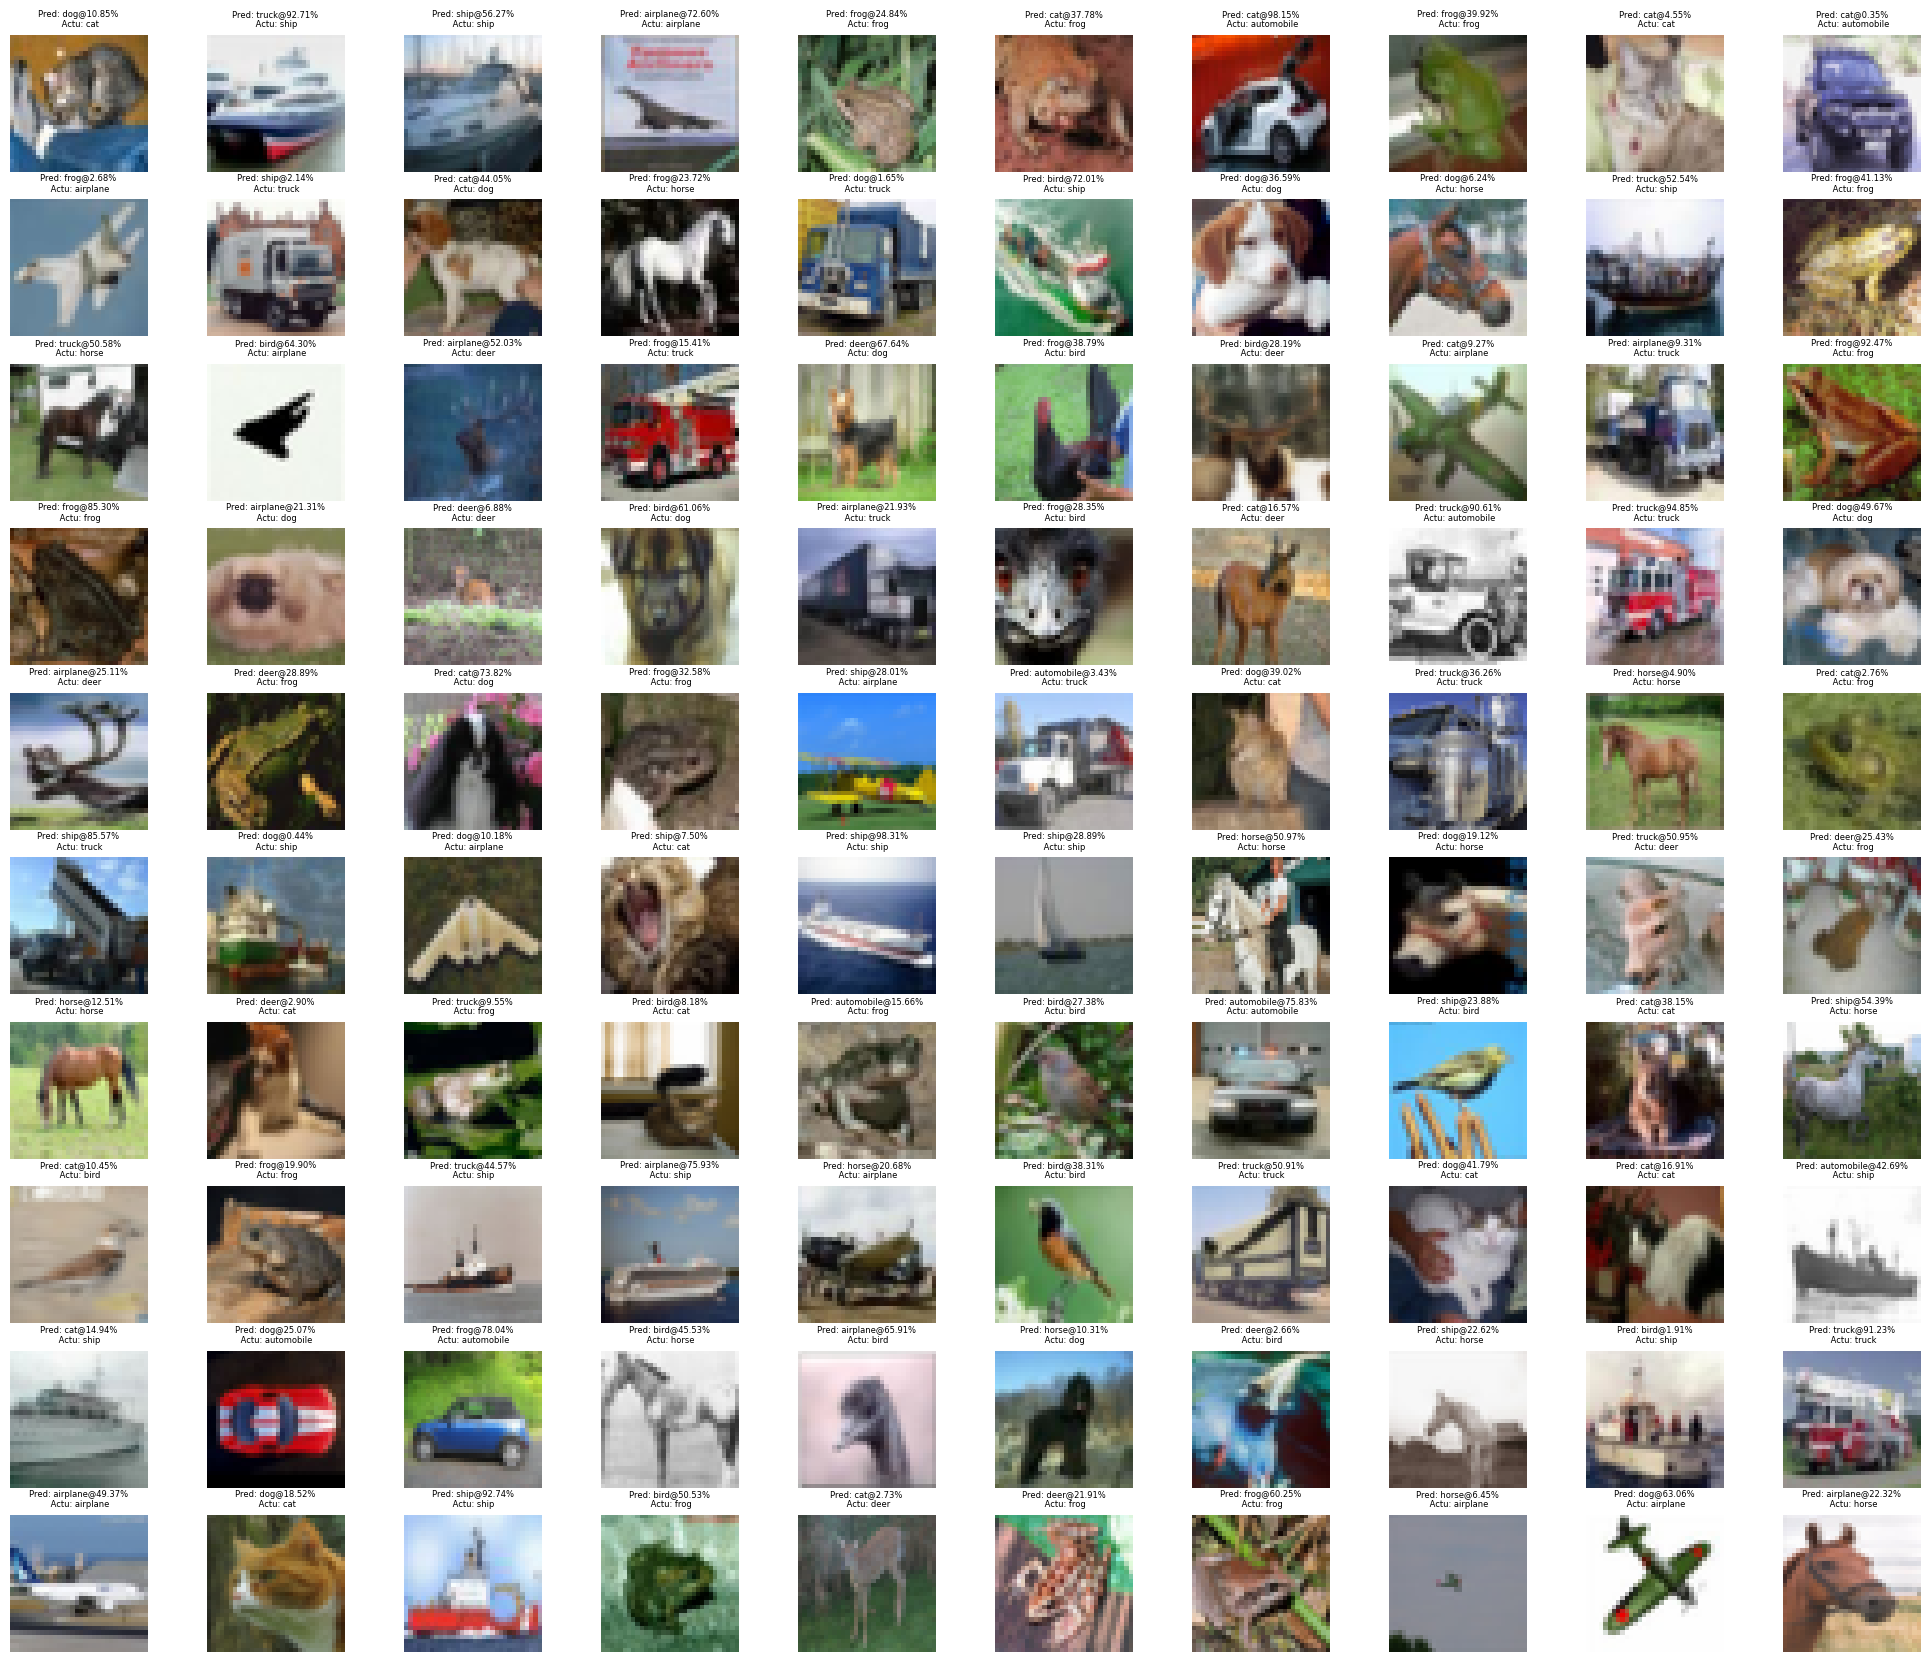

In [51]:
count = 1
images_count = 100

xte = torch.Tensor(Xte[:images_count]).reshape(-1, 3072)/256
scalex = 5
scaley = 7
plt.figure(figsize=(5*scalex, 3*scaley))
for x, y in zip(xte, Yte[:images_count]):
    l = x @ Weight
    probs = torch.nn.functional.softmax(l)
    plt.subplot(images_count//10, 10, count)
    pred = torch.multinomial(probs, 1).item()
    plt.title(f"Pred: {labels[pred]}@{probs[pred]*100:.2f}%\n Actu: {labels[y[0]]}", size=6)
    plt.axis("off")
    count+=1
    plt.imshow(torch.tensor(x*255, dtype=torch.uint8).view(32,32,3))
plt.savefig("Main.png")
plt.show()